#### Airline passenger data Time Series Analysis

1) Create a SL problem (with appropriate shift of your choice) - Justify in text

2) Fill out any missing values (if any) - remember the method for filling in missing values is different for TSF data

3) plot the time series and make any observations regarding cyclic trends, white noise, and random walk (if the series is not white noise or random walk, explain why it is not)

4) Seasonally decompose and interpret thorougly with respect to seasonality, trend, and residuals

5) Is there a need to apply differencing on the series? Why or why not?Ã‚Â 

6) If yes in 5), then apply differencing - did you apply order 1 or order 2? Why or why not? Interpret the results and prove stationarity through Dickey-Fuller

7) Generate forecasts with persistence model. Put comments in text for explanation.

8) Apply AR model and generate forecast for next 5 time steps, along with other statistics to gauge the accuracy of the forecast. Put comments in text for explanation. Interpret thoroughlyÃ‚Â  the model outputs.

9) Apply MA model and generate forecast for next 5 time steps, along with other statistics to gauge the accuracy of the forecast. Put comments in text for explanation.Ã‚Â Interpret thoroughlyÃ‚Â the model outputs.

10) Apply ARIMA model and generate forecast for next 5 time steps, along with other statistics to gauge the accuracy of the forecast. Put comments in text for explanation.Ã‚Â Interpret thoroughly the model outputs.

11) How do ARIMA, MA and AR compare with baseline? How do they compare with each other? Which approach is the best?

#### Functions

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xg 
from sklearn.preprocessing import StandardScaler
#Machine learning Libraries
from sklearn.model_selection import train_test_split
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
#stats Model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.gofplots import qqplot
from pandas.plotting import autocorrelation_plot
import itertools
#Extended Libraries 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


def trans(df,target):
#Data Transformation
    result=pd.DataFrame()
    df=df[[target]]
    df.reset_index(drop=True,inplace=True)
    df.head()
    values = pd.DataFrame(df.values)
    df.reset_index(drop=True,inplace=True)
    df.head()
    values = pd.DataFrame(df.values)
    df = pd.concat([values.shift(1),values,values.shift(-1),values.shift(-2),], axis=1)
    df.dropna(inplace=True)
    df.reset_index(drop=True,inplace=True)
    df.columns=['x','x1','x2','y']
    
    print(df.head(10))
    df.hist(column=df.columns, figsize = (18,18))
    g = sns.PairGrid(df)
    g.map(sns.scatterplot)
    #Correlation Between Lags
    fig, ax = plt.subplots(figsize=(10, 8))
    df_corr=df.corr()
    # mask
    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    # adjust mask and df
    mask = mask[1:, :-1]
    corr = df_corr.iloc[1:,:-1].copy()
    # plot heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
               vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    # yticks
    plt.yticks(rotation=0)
    plt.show()
    y=df['y']
    x=df.drop(['y'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
                    x,y,test_size=0.3, random_state=32)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    sns.displot(df['x'],)

    s=StandardScaler()
    train_t=s.fit_transform(X_train.values)
    test_t=s.fit_transform(X_test.values)
    train_t

    y_test,y_pred,LinearTrain_R_S,LinearTest_R_S,LinearMABE,LinearMSE,LinearRMSE=linear_regression(test_t,train_t, y_train,y_test)
    y_test,y_pred,RidgeTrain_R_S,RidgeTest_R_S,RidgeMABE,RidgeMSE,RidgeRMSE=ridge(test_t,train_t, y_train,y_test)
    y_test,y_pred,gTrain_R_S,gTest_R_S,gMABE,gMSE,gRMSE=gb(test_t,train_t, y_train,y_test)
    y_test,y_pred,ADTrain_R_S,ADTest_R_S,ADMABE,ADMSE,ADRMSE=ada(test_t,train_t, y_train,y_test)
    #y_test,y_pred,XTrain_R_S,XTest_R_S,XMABE,XMSE,XRMSE=xg(test_t,train_t, y_train,y_test)
    algo=['Linear Regression','Ride Regression','GradientBoost','AdaBoost']
    train=[LinearTrain_R_S,RidgeTrain_R_S,gTrain_R_S,ADTrain_R_S]
    test=[LinearTest_R_S, RidgeTest_R_S, gTest_R_S, ADTest_R_S]
    MABE = [LinearMABE,RidgeMABE,gMABE,ADMABE]
    MSE = [LinearMSE,RidgeMSE,gMSE,ADMSE]
    RMSE = [LinearRMSE,RidgeRMSE,gRMSE,ADRMSE]
    result['Algorithms']=algo
    result['Train_accuracy']=train
    result['Test Accuracy']=test
    result['Mean Absolute Error']=MABE
    result['Mean Square Error']=MSE
    result['Root Mean Square Error']=RMSE
    return result

 # Converting the column to DateTime format
def make_index(df,col,form='%d-%m-%Y'):
    df[col] = pd.to_datetime(df[col], format=form)
    df = df.set_index(col)
    df.head()
    return df  
def ploting(data,yearR1,yearR2):
    dff=data.set_index('Date')
    series=dff[yearR1:yearR2]
    print(series.index.min(),series.index.max())
    strr='Sales Unit From '+yearR1+" to "+yearR2 
    plt.title(strr)
    sns.distplot(series['Sales Unit'])
    sns.displot(data=series, x="Sales Unit", hue="Year", multiple="stack")
    sns.displot(data=series,x="Sales Unit", kind="kde")
    #plt.subplots(1,1)
    sns.displot(data=series,x="Sales Unit", kind="ecdf")
    
def calculateError(model,test_t,train_t, y_train,y_test,y_pred):
        Train_R_S = (model.score(train_t, y_train)).round(2)
        Test_R_S  = (model.score(test_t, y_test)).round(2)
        MABE  =     (sklearn.metrics.mean_absolute_error(y_test, y_pred)).round(2)
        MSE  =      (sklearn.metrics.mean_squared_error(y_test, y_pred)).round(2)
        RMSE =      (np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))).round(2)
        print('R-squared score (training): ',Train_R_S)
        print('R-squared score (testing): ',Test_R_S)
        print('Mean Absolute Error:', MABE)  
        print('Mean Squared Error:', MSE)  
        print('Root Mean Squared Error:', RMSE)
        return Train_R_S,Test_R_S,MABE,MSE,RMSE
    
def transform(df):
    df=data[data['Area']==i]
    df.shape
    df=pd.DataFrame(df.groupby(['Date'])['Sales Unit'].sum()).reset_index()
    df['Date']=pd.to_datetime(df['Date'])
    df['Year']=df['Date'].dt.year
    df['Month']=df['Date'].dt.month
    fig = px.line(df,x=df.index,y="Sales Unit",title=i)
    fig.show()
    plt.figure(figsize=(8,8))
    plt.title(i+'  Product Sales Unit Distribution')
    sns.boxplot(data=df, x='Year', y='Sales Unit');
    plt.figure(figsize=(8,8))
    plt.title(i+'  Product Sales Unit Distribution')
    sns.boxplot(data=df, x='Month', y='Sales Unit');

    ploting(df,'2016','2017')
    #Data Transformation
    df=df[df['Date']>='2013-01-01']
    df=df[['Sales Unit']]
    df.reset_index(drop=True,inplace=True)
    df.head()
    values = pd.DataFrame(df.values)
    df = pd.concat([values.shift(1),values,values.shift(-1),values.shift(-2),], axis=1)
    df.dropna(inplace=True)
    df.reset_index(drop=True,inplace=True)
    df.columns=['x','x1','x2','y']
    print(df)
    df.hist(column=df.columns, figsize = (18,18))
    g = sns.PairGrid(df)
    g.map(sns.scatterplot)
    #Correlation Between Lags
    fig, ax = plt.subplots(figsize=(10, 8))
    df_corr=df.corr()
    # mask
    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    # adjust mask and df
    mask = mask[1:, :-1]
    corr = df_corr.iloc[1:,:-1].copy()
    # plot heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
               vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    # yticks
    plt.yticks(rotation=0)
    plt.show()
    y=df['y']
    x=df.drop(['y'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
                    x,y,test_size=0.3, random_state=32)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    sns.displot(df['x'],)

    s=StandardScaler()
    train_t=s.fit_transform(X_train.values)
    test_t=s.fit_transform(X_test.values)
    train_t
    return test_t,train_t, y_train,y_test

def imp_mis_val(df,target,method):
    if method=='mean':
        # imputing using the rolling average
        df = df.assign(target=df.target.fillna(df.target.rolling(24,min_periods=1,).mean()))
    elif method=='median':
        # imputing using the rolling median
        df = df.assign(target=df.target.fillna(df.target.rolling(24,min_periods=1,).median()))# imputing using the median
    return df
from sklearn.linear_model import LinearRegression
import sklearn
import seaborn as sns
def bp(new_df,col1,col2,title):
    plt.figure(figsize=(8,8))
    plt.title(title)
    sns.boxplot(data=new_df, x=col1, y=col2)
def linear_regression(test_t,train_t, y_train,y_test):

    regressor = LinearRegression().fit(train_t, y_train)
    y_pred = regressor.predict(test_t)

    LinearTrain_R_S,LinearTest_R_S,LinearMABE,LinearMSE,LinearRMSE=calculateError(regressor,test_t,train_t, y_train,y_test,y_pred)
    print('Linear regression linear model intercept: {}'
         .format(regressor.intercept_))
    print('Linear regression linear model coeff:\n{}'
         .format(regressor.coef_))
    print('Number of non-zero features: {}'
         .format(np.sum(regressor.coef_ != 0)))

    return y_test,y_pred,LinearTrain_R_S,LinearTest_R_S,LinearMABE,LinearMSE,LinearRMSE


from sklearn.linear_model import Ridge
def ridge(test_t,train_t, y_train,y_test):
    linridge = Ridge(alpha=0.5).fit(train_t, y_train)
    y_pred = linridge.predict(test_t)

    RidgeTrain_R_S,RidgeTest_R_S,RidgeMABE,RidgeMSE,RidgeRMSE=calculateError(linridge,test_t,train_t, y_train,y_test,y_pred)
    print('ridge regression linear model intercept: {}'
         .format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'
         .format(linridge.coef_))
    print('Number of non-zero features: {}'
         .format(np.sum(linridge.coef_ != 0)))
    return y_test,y_pred,RidgeTrain_R_S,RidgeTest_R_S,RidgeMABE,RidgeMSE,RidgeRMSE


from sklearn.ensemble import GradientBoostingRegressor
def gb(test_t,train_t, y_train,y_test):
    gb     =  GradientBoostingRegressor(criterion='mse', max_features='auto',max_depth=2,
                              min_samples_split=10, n_estimators=10,
                              random_state=42).fit(train_t,y_train)
    y_pred =  gb.predict(test_t)

    gTrain_R_S,gTest_R_S,gMABE,gMSE,gRMSE = calculateError(gb,test_t,train_t, y_train,y_test,y_pred)
    print('Gradient Boost  regression model coeff:\n{}'
         .format(gb.feature_importances_))
    print('Non-zero features: {}'
         .format(np.sum(gb.feature_importances_ != 0)))
    print('Features with non-zero weight (sorted by absolute magnitude):')
    return y_test,y_pred,gTrain_R_S,gTest_R_S,gMABE,gMSE,gRMSE

from sklearn.ensemble import AdaBoostRegressor
def ada(test_t,train_t, y_train,y_test):
    ad     = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                      learning_rate=0.02, loss='exponential', n_estimators=8,
                      random_state=42).fit(train_t,y_train)
    y_pred =  ad.predict(test_t)

    ADTrain_R_S,ADTest_R_S,ADMABE,ADMSE,ADRMSE = calculateError(ad,test_t,train_t, y_train,y_test,y_pred)
    print('Adaboost regression model coeff:\n{}'
         .format(ad.feature_importances_))
    print('Non-zero features: {}'
         .format(np.sum(ad.feature_importances_ != 0)))
    print('Features with non-zero weight (sorted by absolute magnitude):')
    return y_test,y_pred,ADTrain_R_S,ADTest_R_S,ADMABE,ADMSE,ADRMSE
import xgboost as xg 
def xg(test_t,train_t, y_train,y_test):
    xg=xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, random_state=42).fit(train_t,y_train)
    y_pred =  xg.predict(test_t)

    XTrain_R_S,XTest_R_S,XMABE,XMSE,XRMSE = calculateError(xg,test_t,train_t, y_train,y_test,y_pred)
    print('XGBoost regression model coeff:\n{}'
         .format(xg.feature_importances_))
    print('Non-zero features: {}'
         .format(np.sum(xg.feature_importances_ != 0)))
    print('Features with non-zero weight (sorted by absolute magnitude):')
    return y_test,y_pred,XTrain_R_S,XTest_R_S,XMABE,XMSE,XRMSE

def plot_res(y_test,y_pred):
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
    df.head(5)
    yTest=pd.Series(y_test)
    s=pd.Series(y_pred)
    yTest=yTest.reset_index(drop=True)
    y1 = plt.plot(yTest,color='blue',label='Origial')
    s  = plt.plot(s,color='red',label='y_prediction')
    plt.legend(loc='best')
    plt.title('Y_test vs Y_pred')
    plt.show(block=False)
    df = df.head(25)
    df.plot(kind='bar',figsize=(16,10))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()

def checkForWhiteNoise(series,yearR1,yearR2):
      #describe stats
      #if mean =0 then series is white noise 
      #plot histogram
      series1=series[yearR1:yearR2]
      plt.subplot(2,2,1)
      series1.hist()
      plt.show()
      plt.subplot(2,2,2)
      autocorrelation_plot(series1)
      plt.show()
      print(series1.describe())
        
def testStationary(series,yearR1,yearR2,windows):
    #Determine Rolling mean
    series1=series[yearR1:yearR2]
    rollmean = series1.rolling(window=windows).mean() #taking year wise
    rollstd =  series1.rolling(window=windows).std()
    #ploting rolling mean and std
    orig = plt.plot(series1,color='blue',label='Origial')
    mean = plt.plot(rollmean,color='red',label='Roll Mean')
    std = plt.plot(rollstd,color='black',label='Roll Std')
    plt.legend(loc='best')
    plt.title('Rolling mean vs Rolling STD')
    plt.show(block=False)
    
    #Summary Statistics
    print('\n Summary Statistics ')
    X = series1.values
    X3=series1.values
    split = int(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('variance1=%f, variance2=%f' % (var1, var2))
    
    #DIcky FUller test
    print('\n Dicky Fuller test ')
    X = series1.values
    result = adfuller(X,autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1]>0.05:
        print('Accept Ho \n Series is not stationary')
    else:
        print('Reject Ho \n Series is Stationary')   
        
# Persistence Model
def persistence_model(series_diff,n):
    #n values to be predicted
    values = DataFrame(series_diff.values)
    dataframe = concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t-1', 't+1']
    # split into train and test sets
    X = dataframe.values
    train, test = X[1:len(X)-n], X[len(X)-n:]
    train_X, train_y = train[:,0], train[:,1]
    test_X, test_y = test[:,0], test[:,1]

    # persistence model
    def model_persistence(x):
        return x

    # walk-forward validation
    predictions = list()
    for x in test_X:
        yhat = model_persistence(x)
        predictions.append(yhat)
    test_score = sqrt(mean_squared_error(test_y, predictions))

    print('Test RMSE: %.3f' % test_score)
    # plot predictions vs expected
    pyplot.plot(test_y)
    pyplot.plot(predictions, color='red')
    pyplot.show()
    return test_score

#### Loading Data

In [2]:
ap=pd.read_csv('airline-passengers.csv')
ap

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


#### 1.SL Problem Transfom with a lag of 3 x,x-1,x-2 to predict x+1

In [10]:
df=make_index(ap,'Month','%Y-%m')

In [11]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


       x   x1     x2      y
0  112.0  118  132.0  129.0
1  118.0  132  129.0  121.0
2  132.0  129  121.0  135.0
3  129.0  121  135.0  148.0
4  121.0  135  148.0  148.0
5  135.0  148  148.0  136.0
6  148.0  148  136.0  119.0
7  148.0  136  119.0  104.0
8  136.0  119  104.0  118.0
9  119.0  104  118.0  115.0


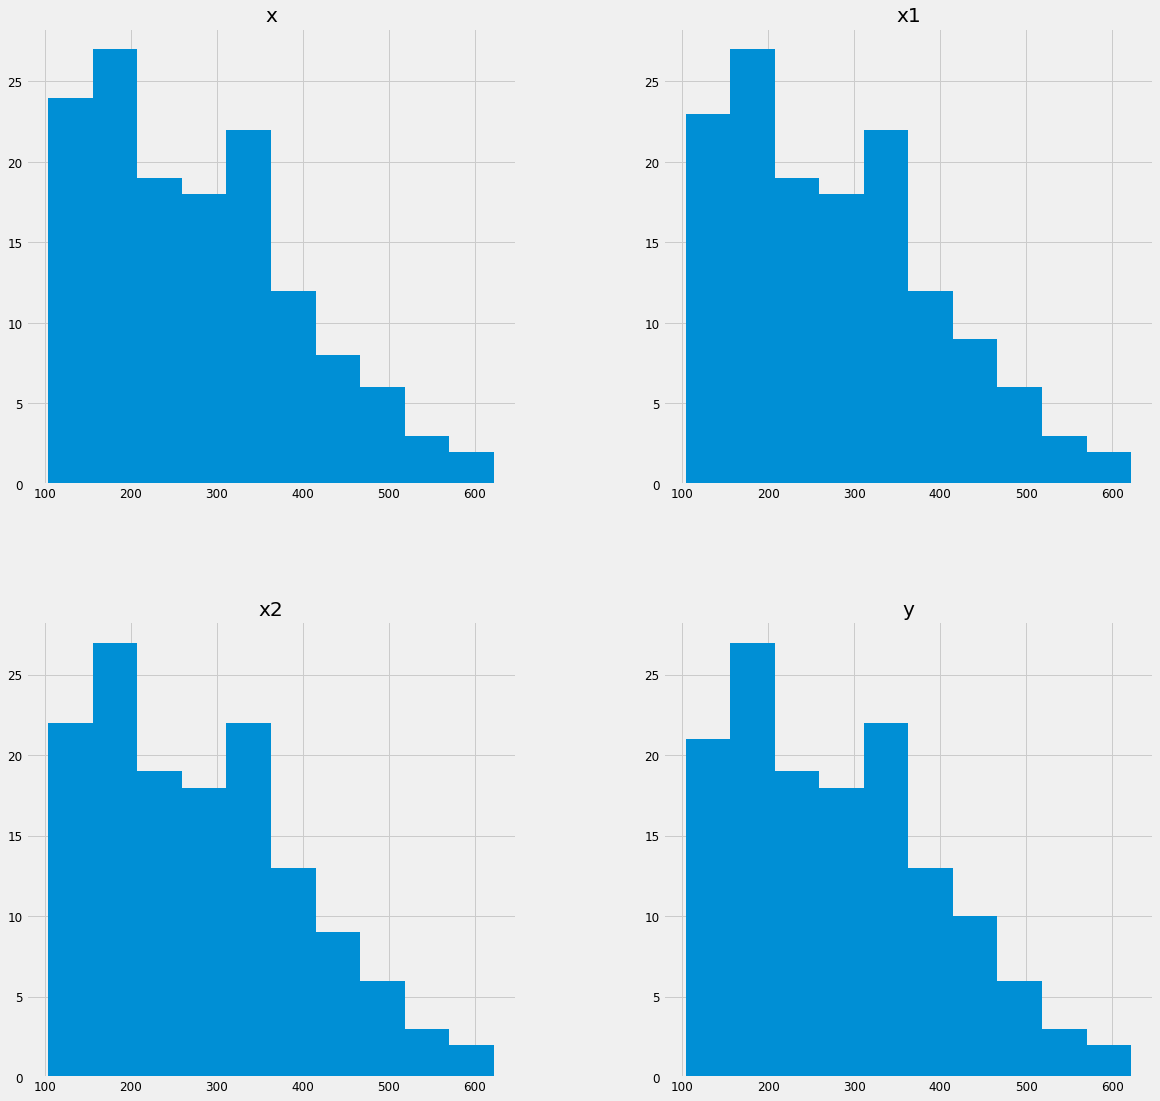

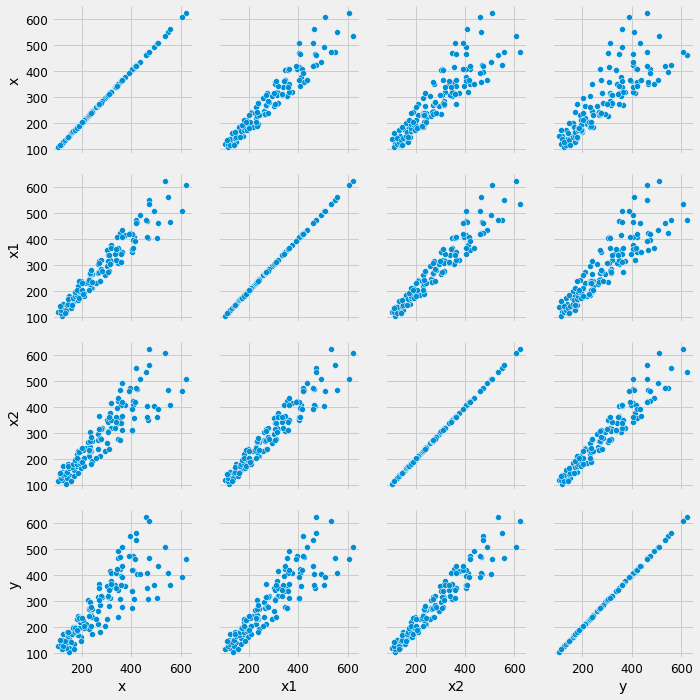

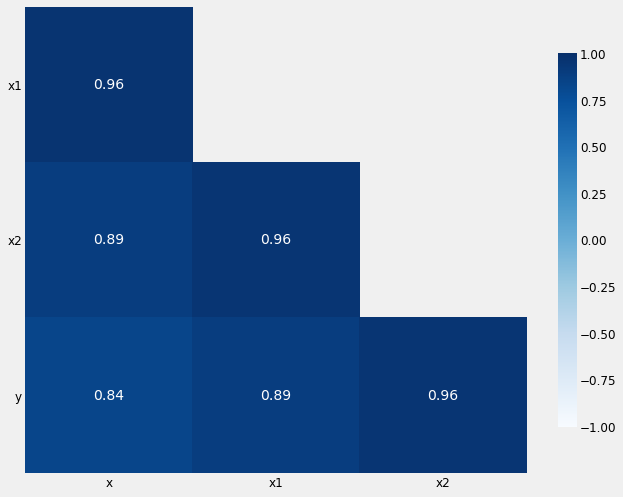

(98, 3) (43, 3) (98,) (43,)
R-squared score (training):  0.93
R-squared score (testing):  0.92
Mean Absolute Error: 27.39
Mean Squared Error: 1100.1
Root Mean Squared Error: 33.17
Linear regression linear model intercept: 288.9183673469388
Linear regression linear model coeff:
[ 19.71149107 -63.57654755 158.42452082]
Number of non-zero features: 3
R-squared score (training):  0.93
R-squared score (testing):  0.91
Mean Absolute Error: 27.41
Mean Squared Error: 1122.96
Root Mean Squared Error: 33.51
ridge regression linear model intercept: 288.9183673469388
ridge regression linear model coeff:
[ 10.43873798 -40.40704458 143.65700354]
Number of non-zero features: 3
R-squared score (training):  0.79
R-squared score (testing):  0.82
Mean Absolute Error: 42.26
Mean Squared Error: 2396.33
Root Mean Squared Error: 48.95
Gradient Boost  regression model coeff:
[0.         0.03796034 0.96203966]
Non-zero features: 2
Features with non-zero weight (sorted by absolute magnitude):
R-squared score (t

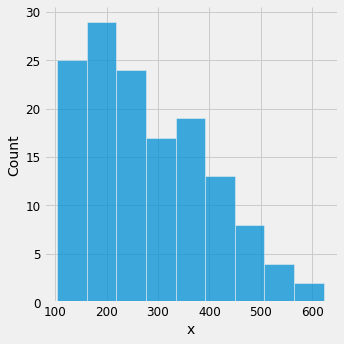

In [12]:
res_SL=trans(df,'Passengers')

In [13]:
res_SL

,Algorithms,Train_accuracy,Test Accuracy,Mean Absolute Error,Mean Square Error,Root Mean Square Error
0,Linear Regression,0.93,0.92,27.39,1100.10,33.17
1,Ride Regression,0.93,0.91,27.41,1122.96,33.51
2,GradientBoost,0.79,0.82,42.26,2396.33,48.95
3,AdaBoost,0.99,0.84,34.05,2054.28,45.32


We chose a lag of 3 seems to have a high correlation and test accuracies are also high seems reasonable the last three months are being used to preduct the passenger cpount in thenext month.

#### 2. No missing Values

In [14]:
df.isnull().sum()

Passengers    0
dtype: int64

#### 3. Visualising Time Series

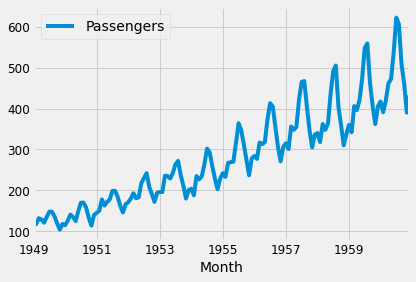

In [15]:
from pandas import read_csv
from matplotlib import pyplot
df.plot()
pyplot.show()

Seasonality and Trend is present series is not stationay series is multiplicative series the series from visual does not seems to be either white noise or random walk as there seems to be a seasonal relation and trend over time seies is not an observation of identically distributed random variable over time these seems to exist a relation between one time period and another. This will further be by plotting the correlogram.

#### 4. Decomposition of Series

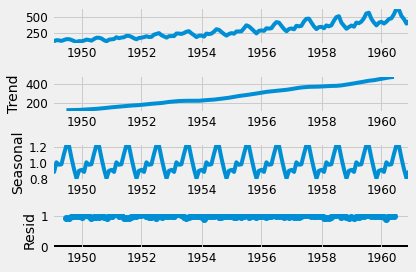

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
result = seasonal_decompose(df, model='multiplicative')
result.plot()
pyplot.show()

1. Series has a linear positive trend from 1950 to 1960 
2. A string seasonal component exists
3. There is random nose element that seems to be stable across the years over the time series

#### Some additional visualisation for analysis

In [17]:
new_df=pd.read_csv('airline-passengers.csv')
new_df['Month']=pd.to_datetime(new_df['Month'])
new_df['Year']=new_df['Month'].dt.year
new_df['Month_1']=new_df['Month'].dt.month

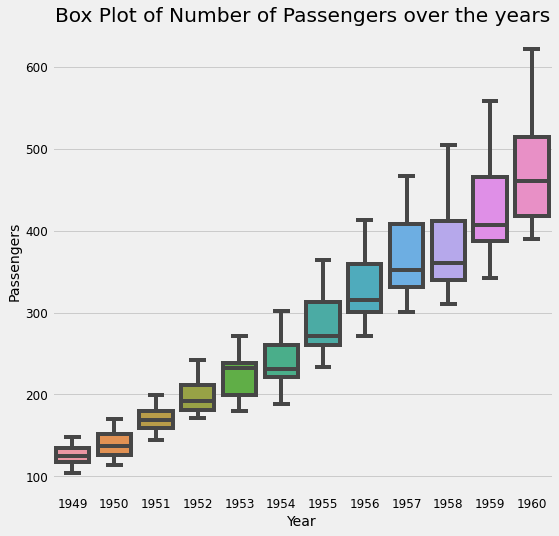

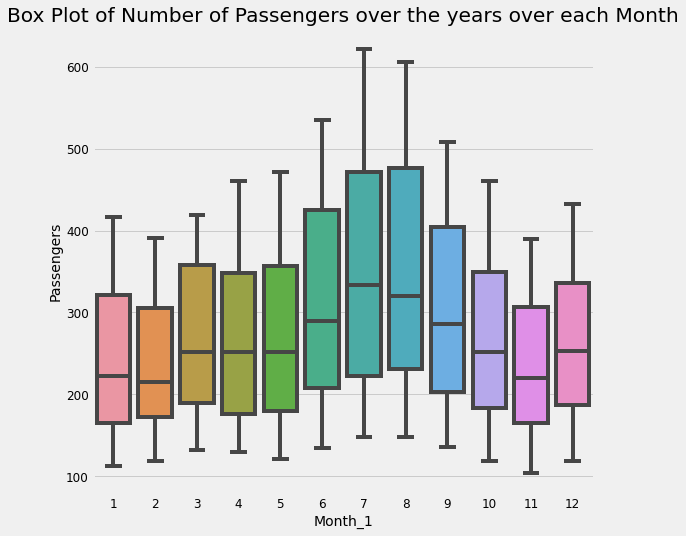

In [18]:
bp(new_df,'Year','Passengers','Box Plot of Number of Passengers over the years')
bp(new_df,'Month_1','Passengers','Box Plot of Number of Passengers over the years over each Month')

1. The mean number of passengers over the years have increased highlighting the ease and populartity of ai travel has rightly grown
2. Also from the second graph we can see that the mean monthly travel is highest in July and August over the years and rightly so as they are the holiday seasons

1952-01-01 00:00:00 1954-12-01 00:00:00


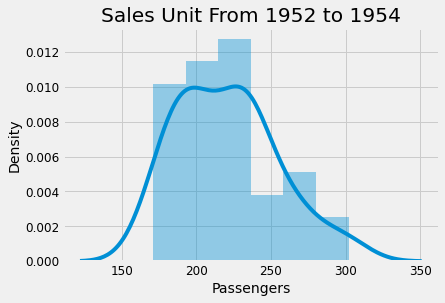

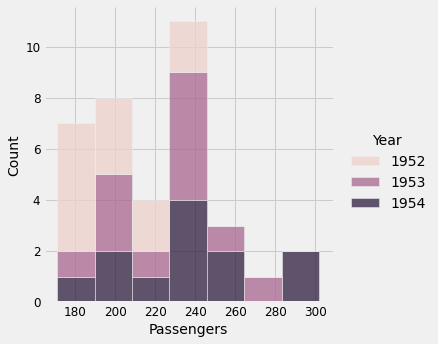

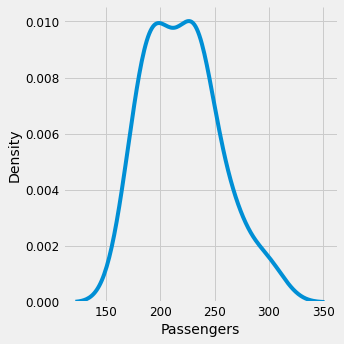

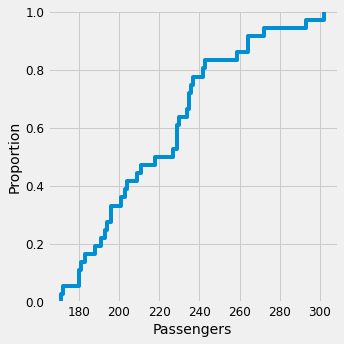

In [19]:
def ploting(data,yearR1,yearR2):
    dff=data.set_index('Month')
    series=dff[yearR1:yearR2]
    print(series.index.min(),series.index.max())
    strr='Sales Unit From '+yearR1+" to "+yearR2 
    plt.title(strr)
    sns.distplot(series["Passengers"])
    sns.displot(data=series, x="Passengers", hue="Year", multiple="stack")
    sns.displot(data=series,x="Passengers", kind="kde")
    #plt.subplots(1,1)
    sns.displot(data=series,x="Passengers", kind="ecdf")
ploting(new_df,'1952','1954')

#### Checking for white noise

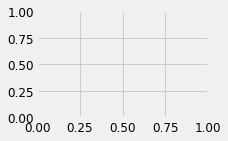

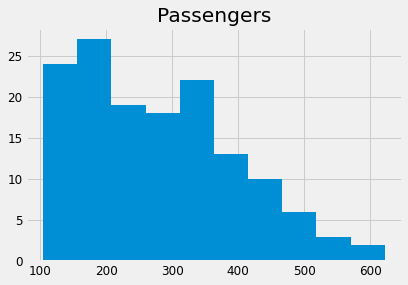

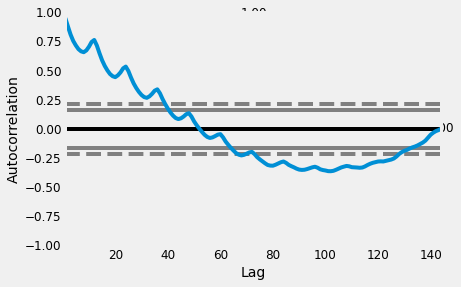

       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


In [20]:
checkForWhiteNoise(df,'1949','1960')

White noise time series is defined by a zero mean, constant variance, and zero correlation. If your time series is white noise, it cannot be predicted, and if your forecast residuals are not white noise, you may be able to improve your model. The statistics and diagnostic plots you can use on your time series to check if it is white noise.
Not white noise correlation exists between lags series can be predicted using time series.

#### 5. Is there a need to apply differencing on the series? Why or why not? Testing for stationarity Dickey Fuller Test

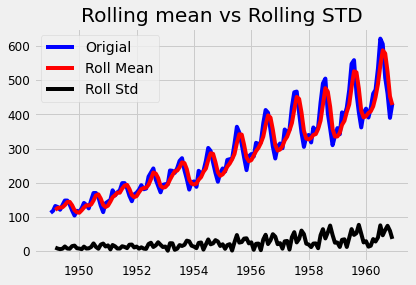


 Summary Statistics 
mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191

 Dicky Fuller test 
ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Accept Ho 
 Series is not stationary


In [21]:
testStationary(df,'1949','1960',3) #series,yearR1,yearR2,windows

As the above statistical test and our observation of trend and seasonality suggests that series is not stationay in order to apply time series models we need to apply differencing or any other transform like box cox, log etc to make the series stationary

#### 6.Appying differencing to make series stationary

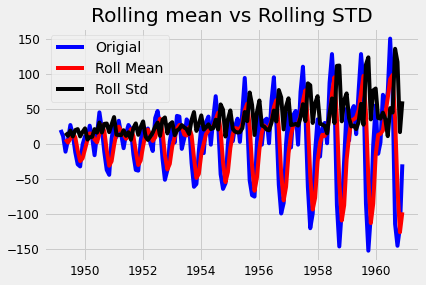


 Summary Statistics 
mean1=3.394366, mean2=4.943662
variance1=862.717715, variance2=5051.067249

 Dicky Fuller test 
ADF Statistic: -2.961695
p-value: 0.038630
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Reject Ho 
 Series is Stationary


In [22]:
series_diff = df.diff(periods=2).dropna()
testStationary(series_diff,'1949','1960',3)

n periods is chosen to be 2 as 1st order differecing is unable to make the series statiionary however second order differencing makes the series stationary that is why it is chosen and it passes the Dickey Fuller Test as shown above.

#### 7. Persistence Model

Test RMSE: 100.077


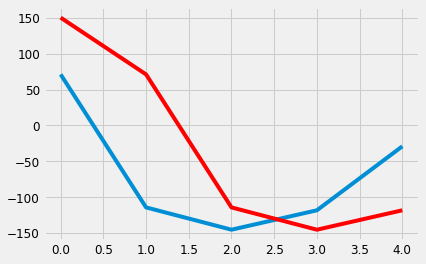

In [27]:
t1=persistence_model(series_diff,5)
er=[]
er.append(t1)

#### 8. Apply AR model and generate forecast for next 5 time steps, along with other statistics to gauge the accuracy of the forecast. 


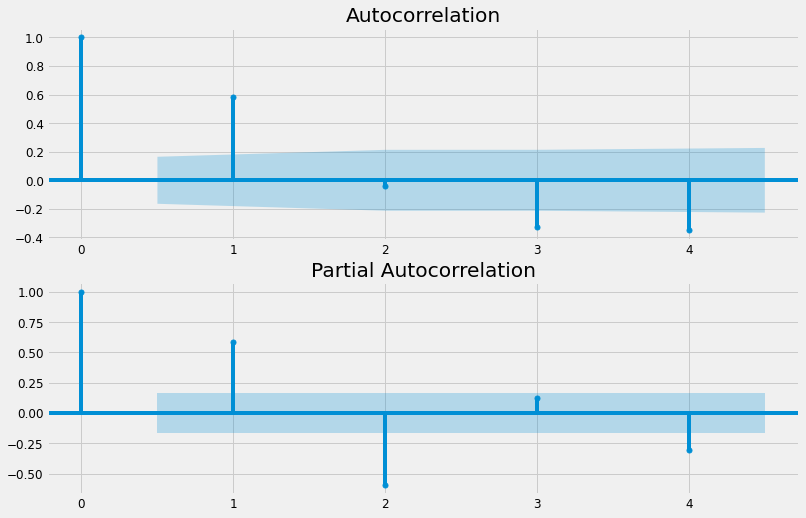

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig=plot_acf(series_diff,lags=4,ax=ax1)
ax2 = fig.add_subplot(212)
fig=plot_pacf(series_diff,lags=4,ax=ax2)

predicted=92.996153, expected=71.000000
predicted=-39.952401, expected=-114.000000
predicted=-133.661586, expected=-145.000000
predicted=-57.575920, expected=-118.000000
predicted=-54.956734, expected=-29.000000
Test RMSE: 45.651


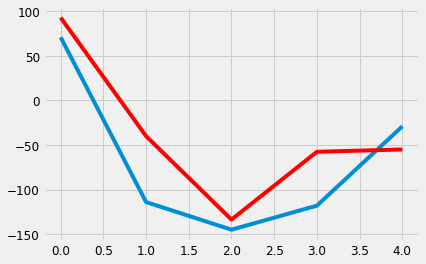

In [29]:


# split dataset
X =series_diff.values
train, test = X[1:len(X)-5], X[len(X)-5:]
# train autoregression
window = 4
model = AutoReg(train, lags=4)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
er.append(rmse)
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In the auto Correlation Plot we can see that the correlation between lags is high at 1 and 4 after trying both the values the RMSE was minimised at lag = 4. Also the RMSE is lower than the persistence model so this indicates model is performing better than atleast the basic baseline so it is a reasonable model to forecast this data

#### 9) Apply MA model and generate forecast for next 5 time steps

predicted=39.057278, expected=71.000000
predicted=-125.222667, expected=-114.000000
predicted=-355.438662, expected=-145.000000
predicted=-177.955525, expected=-118.000000
predicted=96.050537, expected=-29.000000
Test RMSE: 113.722


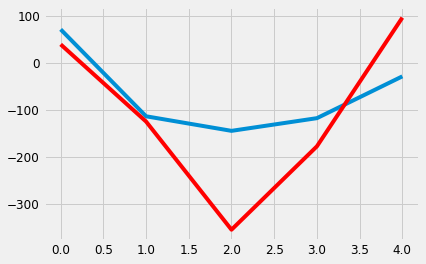

In [30]:
# MA example
from statsmodels.tsa.arima.model import ARIMA
from random import random

# split dataset
X = series_diff.values

train, test = X[1:len(X)-5], X[len(X)-5:]
# train autoregression
window = 4
model = ARIMA(train, order=(0, 0,4))
model_fit = model.fit()
coef = model_fit.params

coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
er.append(rmse)
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


For MA after hyper parametre tuning and taking an idea from the ACF and PACF plot RMSE was being minimise at lag window of 4 the RMSE is much higher than AR Model also the baseline model so MA alone is not a right model to predict this series we use the MA model by making the other parametres of the ARIMA model zero

#### 10. Apply ARIMA model and generate forecast for next 5 time steps

predicted=136.895651, expected=71.000000
predicted=9.163960, expected=-114.000000
predicted=-159.263087, expected=-145.000000
predicted=-100.131676, expected=-118.000000
predicted=-53.920780, expected=-29.000000
Test RMSE: 64.273


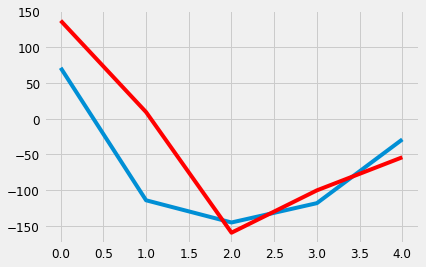

In [31]:
# ARMA ARIMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
X =series_diff.values
train, test = X[1:len(X)-5], X[len(X)-5:]
# fit model
window = 2
model = ARIMA(train, order=(2,0, 2))
model_fit = model.fit()
# make prediction
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
er.append(rmse)
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

The best parametres for the ARIMA model are chosen to be p=2 d=0 q=2 series is already differenced twice differecing it again is giving high error. ARIMA is performing better than the baseline but not as good as the AR model alone.

#### Best Approach

In [32]:
lis=['Persistence Model','AR','MA','ARIMA']
cdf = pd.DataFrame({'Model':lis,'Test_RMSE': er}) 
cdf

,Model,Test_RMSE
0,Persistence Model,100.076970
1,AR,45.651416
2,MA,113.721606
3,ARIMA,64.273410


The AR Model gives the best result for this airline passenger data MA is performing worse than the Persistence Model AR and ARIMA are producing better results with AR taking the lead.